# Load Data

In [1]:
from log_analysis import *

baseline = {'mAP': .383, 'AP@75': .441, 'AP@50': .594, 'LAMR': .45776}
sweeps = {}

sizes = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 'all']
sweeps['fine-tuning'] = df_from_sweep('sweeps/fine-tune', sizes)

sizes = [1, 2, 5, 10, 20, 50, 'all']
sweeps['GPA all'] = df_from_sweep('sweeps/gpa_ppp', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['GPA'] = df_from_sweep('sweeps/gpa_p-p', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100, 'all']
sweeps['SPA all'] = df_from_sweep('sweeps/gpa_pxg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100, 'all']
sweeps['SPA'] = df_from_sweep('sweeps/gpa_-xg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV'] = df_from_sweep('sweeps/adv_0', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV pretrained'] = df_from_sweep('sweeps/adv_0_p', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV necks 0+4'] = df_from_sweep('sweeps/adv_04', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV necks 0+1+4'] = df_from_sweep('sweeps/adv_014', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['SSADA'] = df_from_sweep('sweeps/adv_g0', sizes)

# sizes = [1, 2, 5]
# sweeps['SSADA 19²'] = df_from_sweep('sweeps/adv_g0_', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV + SPA'] = df_from_sweep('sweeps/adv_0_gpa_-xg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['GPA unsupervised'] = df_from_sweep('sweeps/gpa_p-p_u', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV unsupervised'] = df_from_sweep('sweeps/adv_0_u', sizes)

sizes = [1,2,5,10,20,50,100]
sweeps['fine-tuning MW'] = df_from_sweep('sweeps/fine-tune_mw', sizes, alt_pattern=True)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV + SPA MW'] = df_from_sweep('sweeps/adv_0_gpa_-xg_mw', sizes, alt_pattern=True)

df = pd.concat(sweeps.values(), keys=sweeps.keys()).rename_axis(['setting', None]).reset_index(level=0)
df.replace(['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50'], ['mAP', 'AP@75', 'AP@50'], inplace=True)

# Mirror Worlds
baseline_mw = {'mAP': .4, 'AP@75': .43, 'AP@50': .655, 'LAMR': .4484}
sweeps_mw = {}

sizes = [1, 2, 5, 10, 20, 50, 100, 200, 'all']
sweeps_mw['fine-tuning'] = df_from_sweep('sweeps_mw/fine-tune', sizes, all_size=819)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['ADV + SPA'] = df_from_sweep('sweeps_mw/adv_0_gpa_-xg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['fine-tuning PIROPO'] = df_from_sweep('sweeps_mw/fine-tune_piropo', sizes, alt_pattern=True)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['ADV + SPA PIROPO'] = df_from_sweep('sweeps_mw/adv_0_gpa_-xg_piropo',
                                                                 sizes,
                                                                 alt_pattern=True)

df_mw = pd.concat(sweeps_mw.values(), keys=sweeps_mw.keys()).rename_axis(['setting', None]).reset_index(level=0)
df_mw.replace(['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50'], ['mAP', 'AP@75', 'AP@50'], inplace=True)


sweeps/adv_0_gpa_-xg/1c.log does not exist, skipping it ...
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log


# Print Data for LaTEX

In [38]:
def ci95(g):
    ci95 = 1.96 * g.sem()
    return ci95


data = df_mw[df_mw['setting'] == 'ADV + SPA PIROPO'].groupby(['size', 'metric']).agg(['mean', ci95]).round(3)
# flatten column multi index
data.columns = data.columns.get_level_values(1)
# print for copy-paste to latex
for size in data.index.get_level_values(0).unique():
    print(str(size).rjust(4), end='')
    for metric in ['mAP', 'AP@75', 'AP@50', 'LAMR']:
        print(f" & {data.loc[(size, metric)]['mean']:0.3f}({str(data.loc[(size, metric)]['ci95']).replace('.','')})",
              end='')
    print('\\\\')

   1 & 0.444(0003) & 0.471(0008) & 0.729(0002) & 0.361(0002)\\
   2 & 0.490(0042) & 0.528(0047) & 0.807(0071) & 0.268(0082)\\
   5 & 0.486(0018) & 0.519(0015) & 0.809(0053) & 0.273(0055)\\
  10 & 0.497(0022) & 0.539(003) & 0.821(0048) & 0.253(0055)\\
  20 & 0.484(0035) & 0.505(0034) & 0.831(0077) & 0.256(0103)\\
  50 & 0.468(0035) & 0.501(0044) & 0.805(0036) & 0.288(0041)\\
 100 & 0.491(0018) & 0.520(0021) & 0.823(0011) & 0.270(0015)\\


# Baseline

## supervised

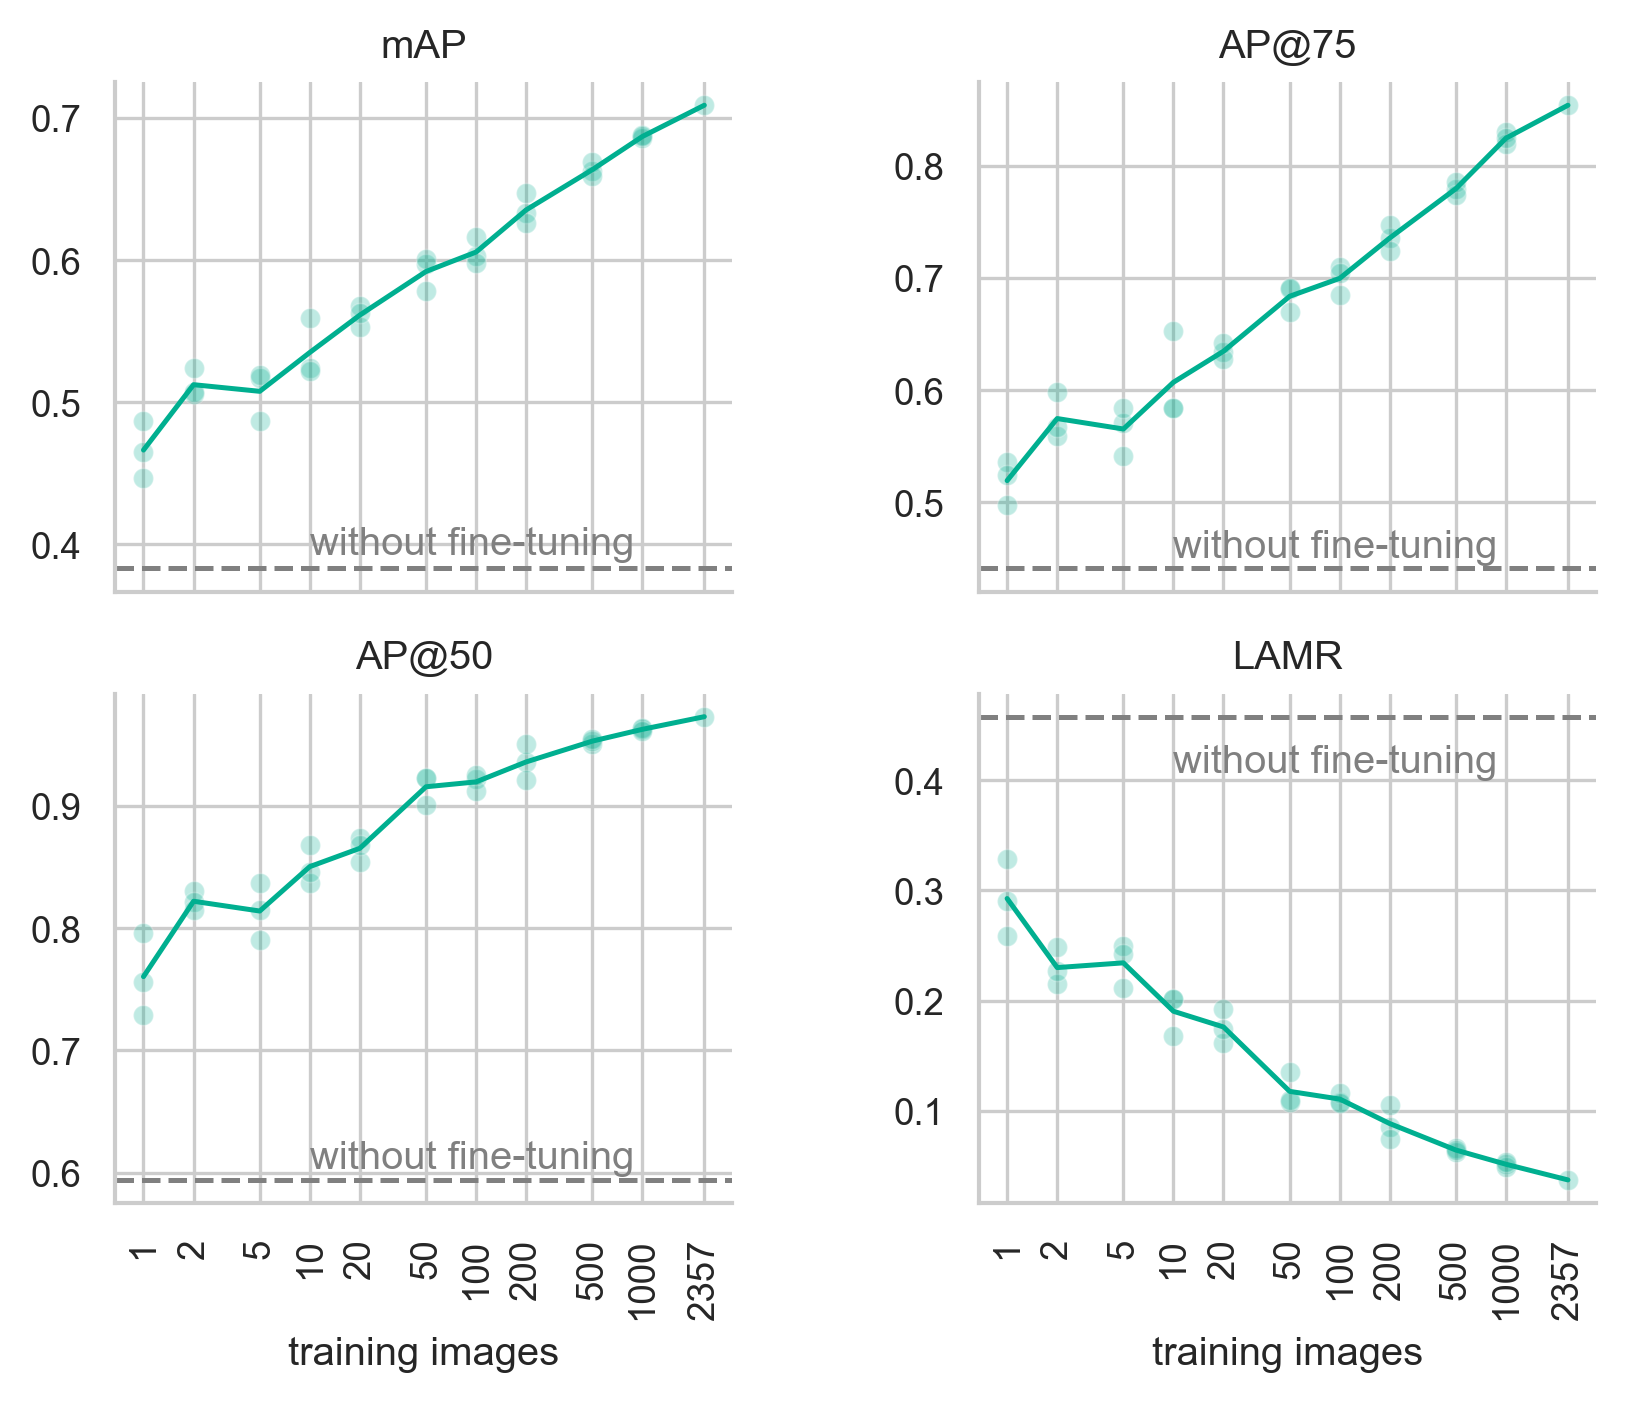

In [102]:
import matplotlib as mpl

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(default())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
g = sb.FacetGrid(df[df['setting'].isin(['fine-tuning'])], col='metric', sharey=False, sharex=True, height=4, aspect=1, col_wrap=2)
# scatterplot with transparency
g.map(sb.scatterplot, 'size', 'value', alpha=0.25)
# lineplot without error bars
g.map(sb.lineplot, 'size', 'value', err_style=None)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(5.5, 5.5)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=None, bottom=None, top=.75, wspace=.4, hspace=.4)
# baseline reference line
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.axhline(list(baseline.values())[i], ls ='--', c='.5') #, dashes=(2,1), zorder=0)
    ax.text(10, list(baseline.values())[i] + (-0.05 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1,2,5,10,20,50,100,200,500,1000,2357]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)
g.savefig(f'images/base_ft_p')

## unsupervised

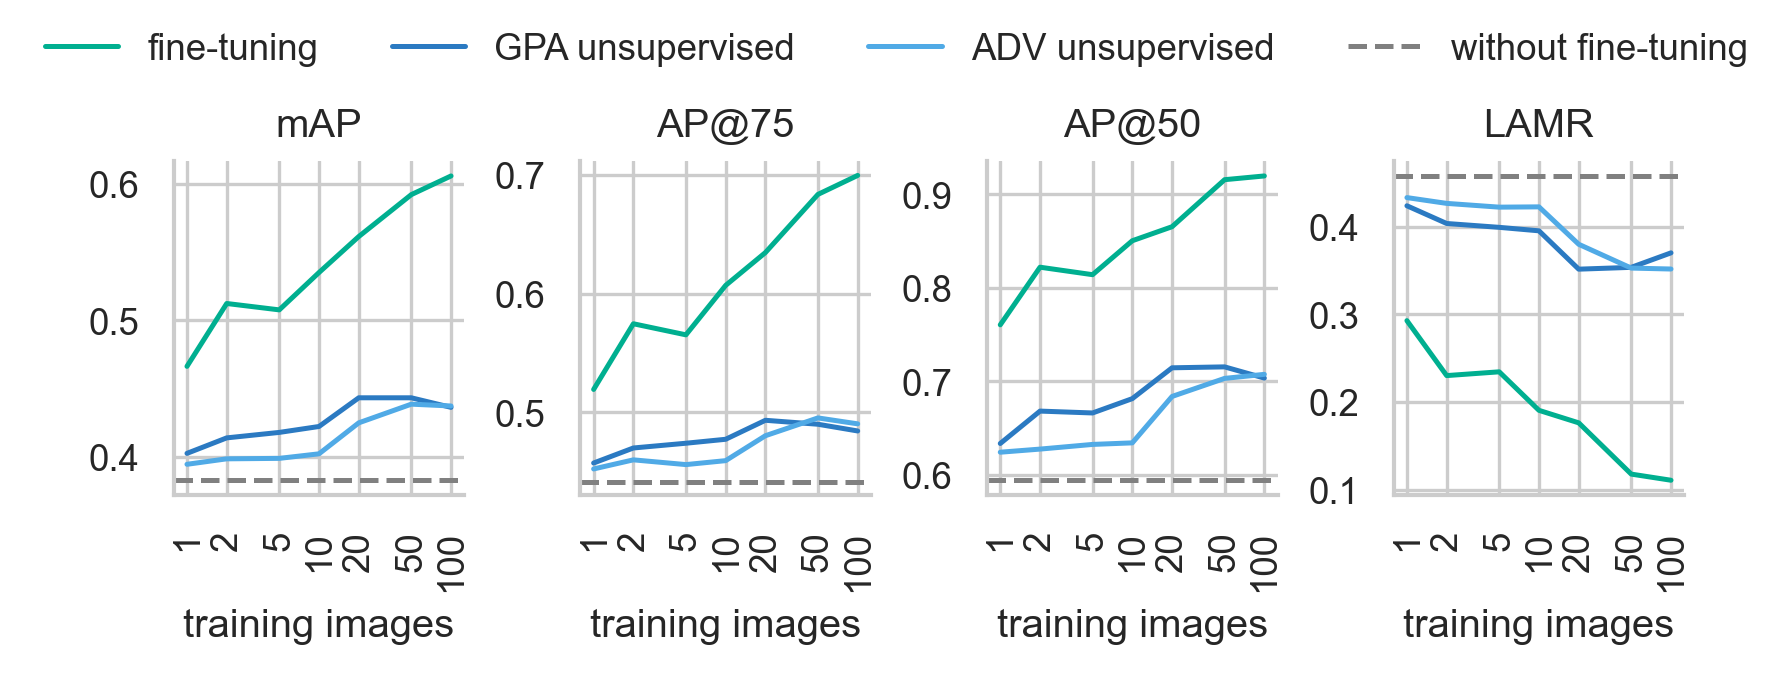

In [99]:
import matplotlib as mpl

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(cyan())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
g = sb.relplot(
    data=df[(df['setting'].isin(['fine-tuning', 'GPA unsupervised', 'ADV unsupervised']))
            & (df['size'] <= 100)],
    x='size',
    y='value',
    col='metric',
    hue='setting',
    kind='line',
    err_style=None,
    facet_kws={
        'sharey': False,
        'sharex': True,
        'legend_out': False
    },
    height=2,
    aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(5.5, 2)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=None, bottom=None, top=.75, wspace=.4)
# baseline reference line
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.axhline(list(baseline.values())[i], ls='--', c='.5')
axes[1].set_ylim(ymin=.43) # adjust scaling to properly show reference line
# legend
axes[0].legend([], [], frameon=False) # remove old legend
h, l = axes[0].get_legend_handles_labels() # extract handles to manually add one for reference line
g.fig.legend(handles=h + [axes[0].lines[6]], labels=l + ['without fine-tuning'], loc=9, ncol=4, frameon=False)
# labels
g.set_xlabels('training images')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)
g.savefig(f'images/base_us_p.svg')

# Prototype-based Methods

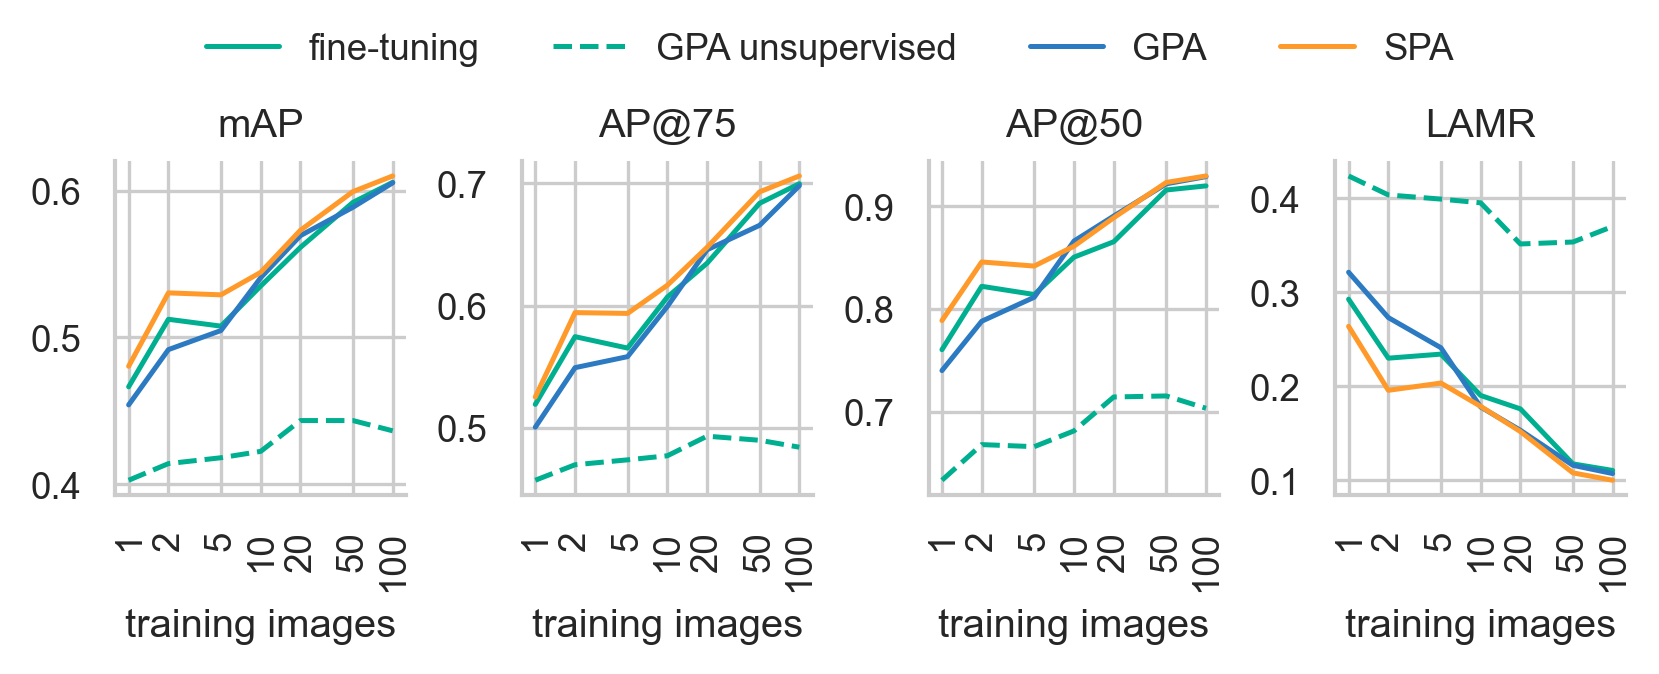

In [114]:
import matplotlib as mpl

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(palegreen())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
hue_order=['fine-tuning', 'GPA unsupervised', 'GPA', 'SPA']
g = sb.relplot(data=df[(df['setting'].isin(['fine-tuning', 'GPA unsupervised', 'GPA', 'SPA']))
                       & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               hue_order=hue_order,
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=2,
               aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(5.5, 2)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=None, bottom=None, top=.75, wspace=.4)
# change linestyle of unsupervised baseline
axes = g.axes.flatten()
for ax in axes:
    ax.lines[1].set_linestyle('--')
    ax.lines[1].set_c('#00AF90')
# legend
axes[0].legend([], [], frameon=False)  # remove old legend
h, l = axes[0].get_legend_handles_labels()  # extract handles to manually add one for reference line
g.fig.legend(handles=axes[0].lines, labels=l, loc=9, ncol=4, frameon=False)
# labels
g.set_xlabels('training images')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)
g.savefig(f'images/prot_p.svg')

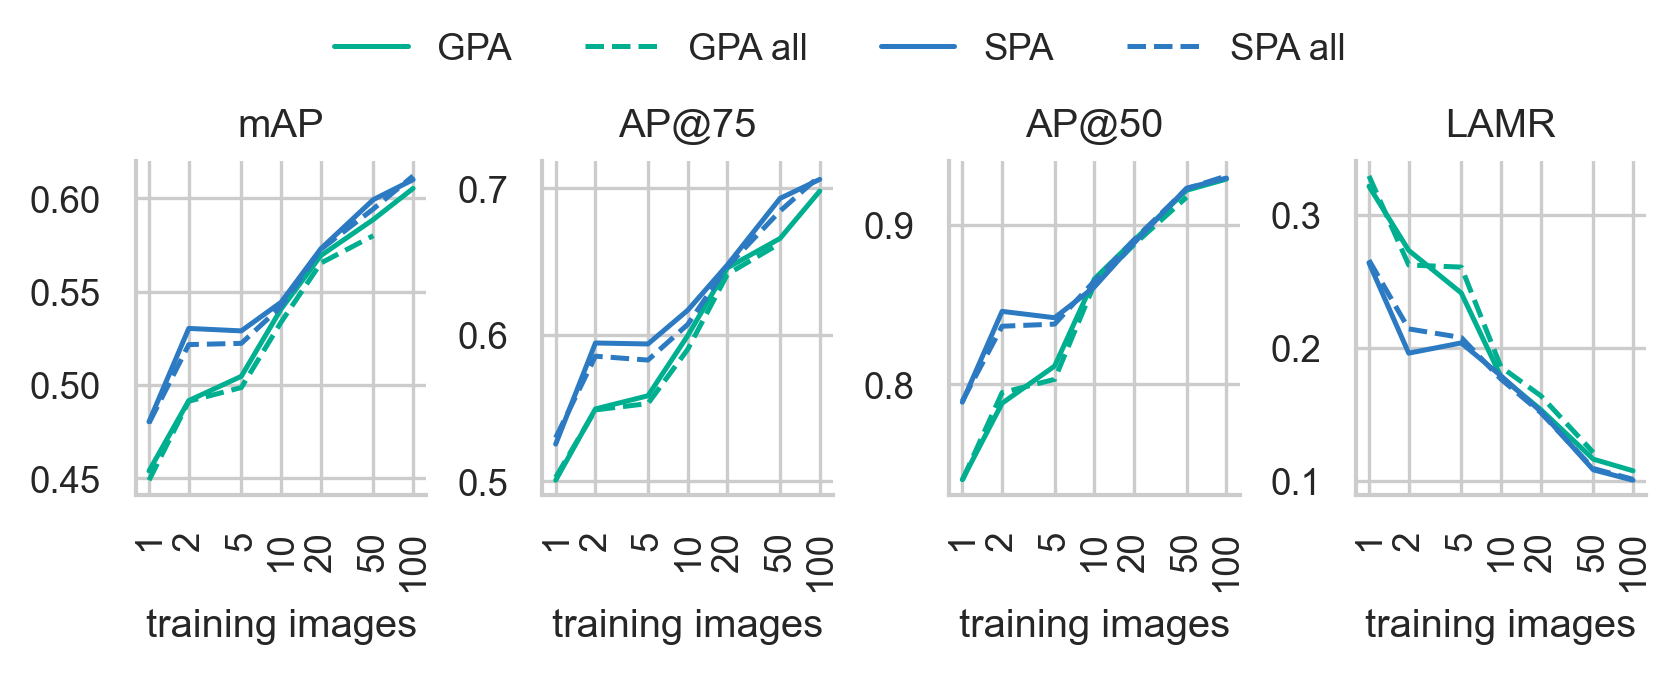

In [227]:
import matplotlib as mpl

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(palegreen())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
hue_order = ['GPA', 'GPA all', 'SPA', 'SPA all']
g = sb.relplot(data=df[(df['setting'].isin(['GPA', 'GPA all', 'SPA', 'SPA all']))
                       & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               hue_order=hue_order,
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=2,
               aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(5.5, 2)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=None, bottom=None, top=.75, wspace=.4)
# change linestyle of unsupervised baseline
axes = g.axes.flatten()
for ax in axes:
    ax.lines[1].set_linestyle('--')
    ax.lines[1].set_c('#00AF90')
    ax.lines[3].set_linestyle('--')
    ax.lines[3].set_c('#2B7AC2')
# legend
axes[0].legend([], [], frameon=False)  # remove old legend
h, l = axes[0].get_legend_handles_labels()  # extract handles to manually add one for reference line
g.fig.legend(handles=axes[0].lines, labels=l, loc=9, ncol=4, frameon=False)
# labels
g.set_xlabels('training images')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)
g.savefig(f'images/prot_p.svg')

# Adversarial-based Methods

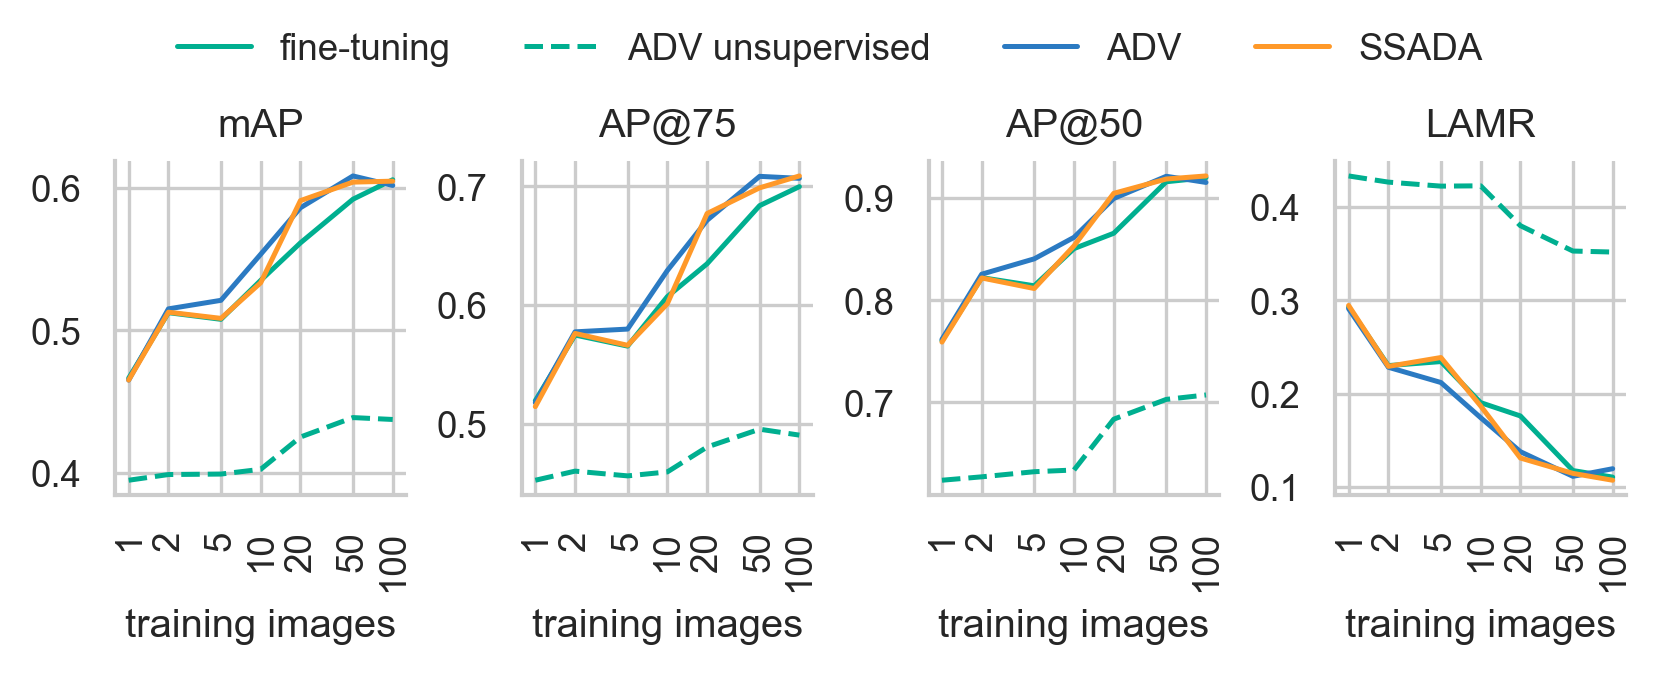

In [ ]:
import matplotlib as mpl

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(palegreen())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
hue_order=['fine-tuning', 'ADV unsupervised', 'ADV', 'SSADA']
g = sb.relplot(data=df[(df['setting'].isin(['fine-tuning', 'ADV unsupervised', 'ADV', 'SSADA']))
                       & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               hue_order=hue_order,
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=2,
               aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(5.5, 2)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=None, bottom=None, top=.75, wspace=.4)
# change linestyle of unsupervised baseline
axes = g.axes.flatten()
for ax in axes:
    ax.lines[1].set_linestyle('--')
    ax.lines[1].set_c('#00AF90')
# legend
axes[0].legend([], [], frameon=False)  # remove old legend
h, l = axes[0].get_legend_handles_labels()  # extract handles to manually add one for reference line
g.fig.legend(handles=axes[0].lines, labels=l, loc=9, ncol=4, frameon=False)
# labels
g.set_xlabels('training images')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)

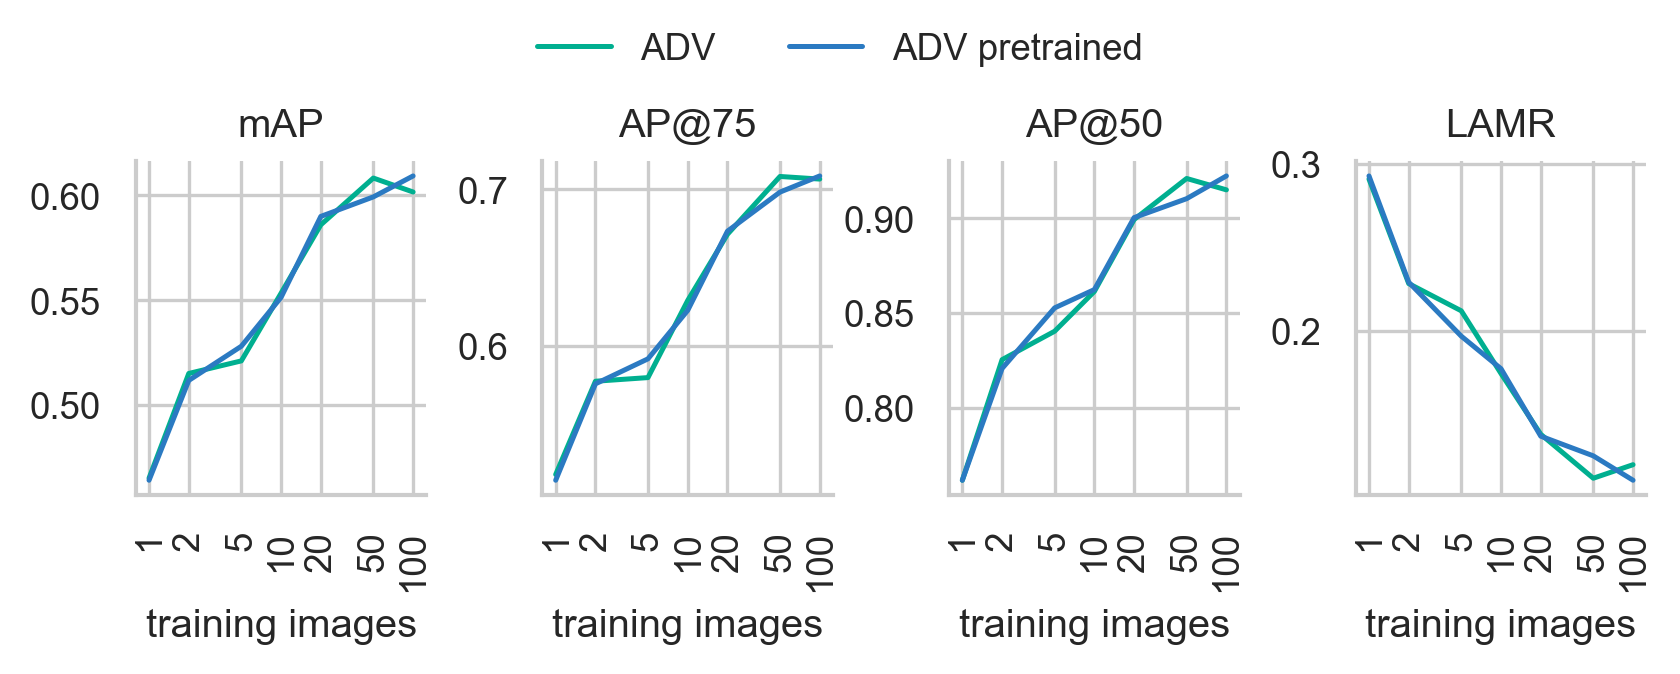

In [3]:
import matplotlib as mpl

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(default())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
g = sb.relplot(data=df[(df['setting'].isin(['ADV', 'ADV pretrained']))
                       & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=2,
               aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(5.5, 2)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=None, bottom=None, top=.75, wspace=.4)
# legend
axes = g.axes.flatten()
axes[0].legend([], [], frameon=False)  # remove old legend
h, l = axes[0].get_legend_handles_labels()  # extract handles to manually add one for reference line
g.fig.legend(handles=axes[0].lines, labels=l, loc=9, ncol=4, frameon=False)
# labels
g.set_xlabels('training images')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)

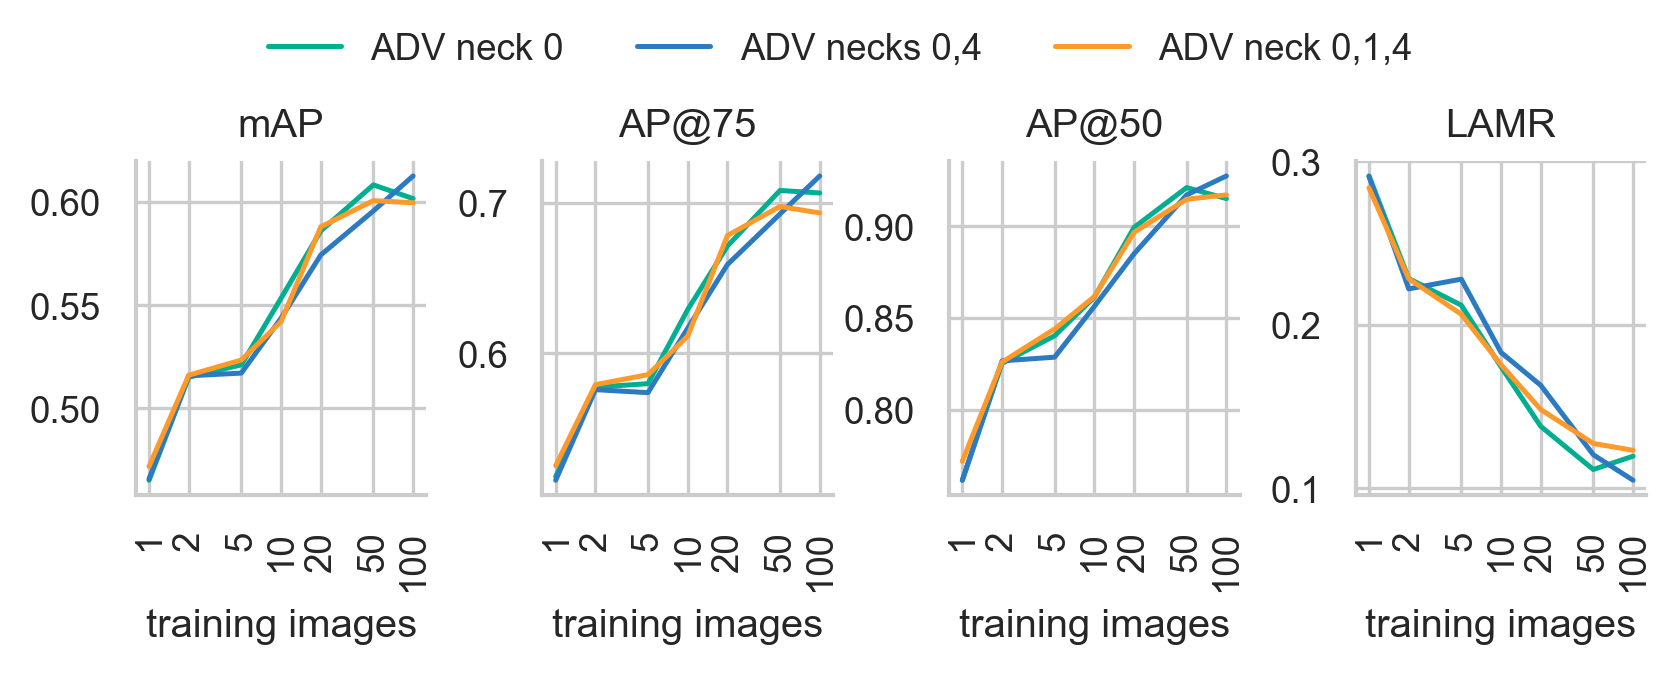

In [3]:
import matplotlib as mpl

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(default())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
g = sb.relplot(data=df[(df['setting'].isin(['ADV', 'ADV necks 0+4', 'ADV necks 0+1+4']))
                       & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=2,
               aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(5.5, 2)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=None, bottom=None, top=.75, wspace=.4)
# legend
axes = g.axes.flatten()
axes[0].legend([], [], frameon=False)  # remove old legend
h, l = axes[0].get_legend_handles_labels()  # extract handles to manually add one for reference line
g.fig.legend(handles=axes[0].lines, labels=['ADV neck 0', 'ADV necks 0,4', 'ADV neck 0,1,4'], loc=9, ncol=4, frameon=False)
# labels
g.set_xlabels('training images')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)

## whether to use pretraining

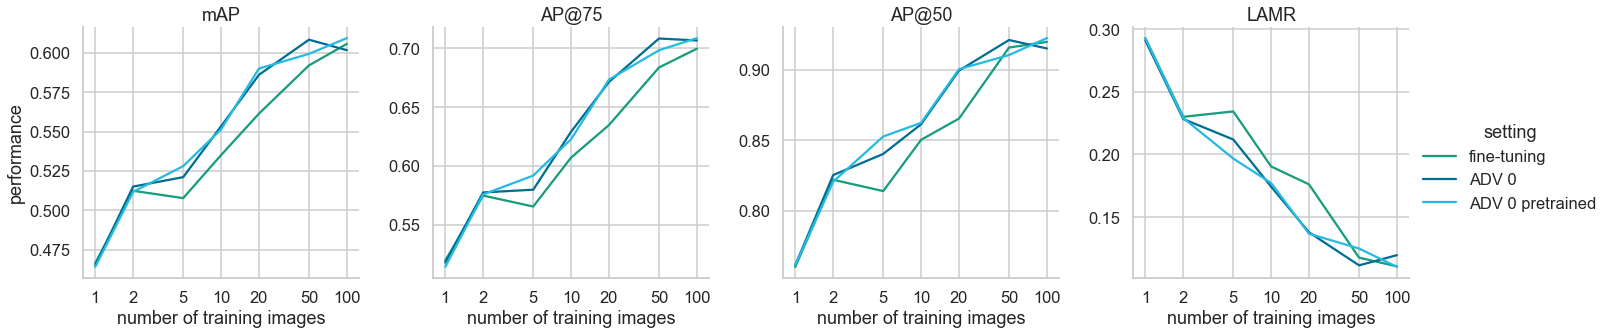

In [ ]:
sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())

# facet grid with individual x-axis
g = sb.FacetGrid(df[(df['setting'].isin(['fine-tuning', 'ADV 0', 'ADV 0 pretrained'])) & (df['size'] <= 100)],
                 col='metric',
                 hue='setting',
                 sharey=False,
                 sharex=True,
                 height=5,
                 aspect=1)
# scatterplot with transparency
# g.map(sb.scatterplot, 'size', 'value', alpha=0.75)
# lineplot without error bars
g.map(sb.lineplot, 'size', 'value', err_style=None)
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)

# Combinations

## PIROPO

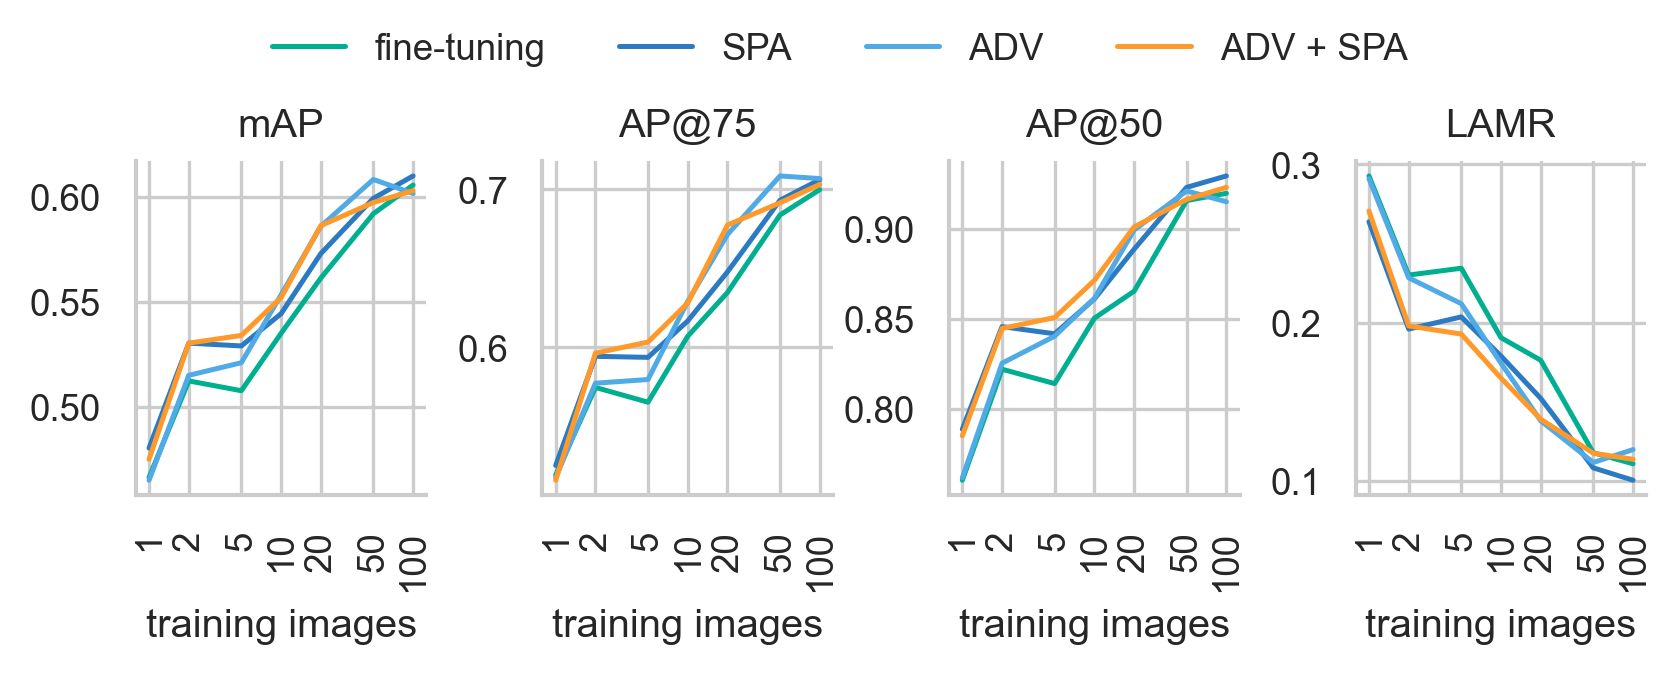

In [121]:
import matplotlib as mpl

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(cyan())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
g = sb.relplot(data=df[(df['setting'].isin(['fine-tuning', 'ADV', 'SPA', 'ADV + SPA']))
                       & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=2,
               aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(5.5, 2)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=None, bottom=None, top=.75, wspace=.4)
# legend
axes = g.axes.flatten()
axes[0].legend([], [], frameon=False)  # remove old legend
h, l = axes[0].get_legend_handles_labels()  # extract handles to manually add one for reference line
g.fig.legend(handles=axes[0].lines, labels=l, loc=9, ncol=4, frameon=False)
# labels
g.set_xlabels('training images')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)

## Mirror Worlds

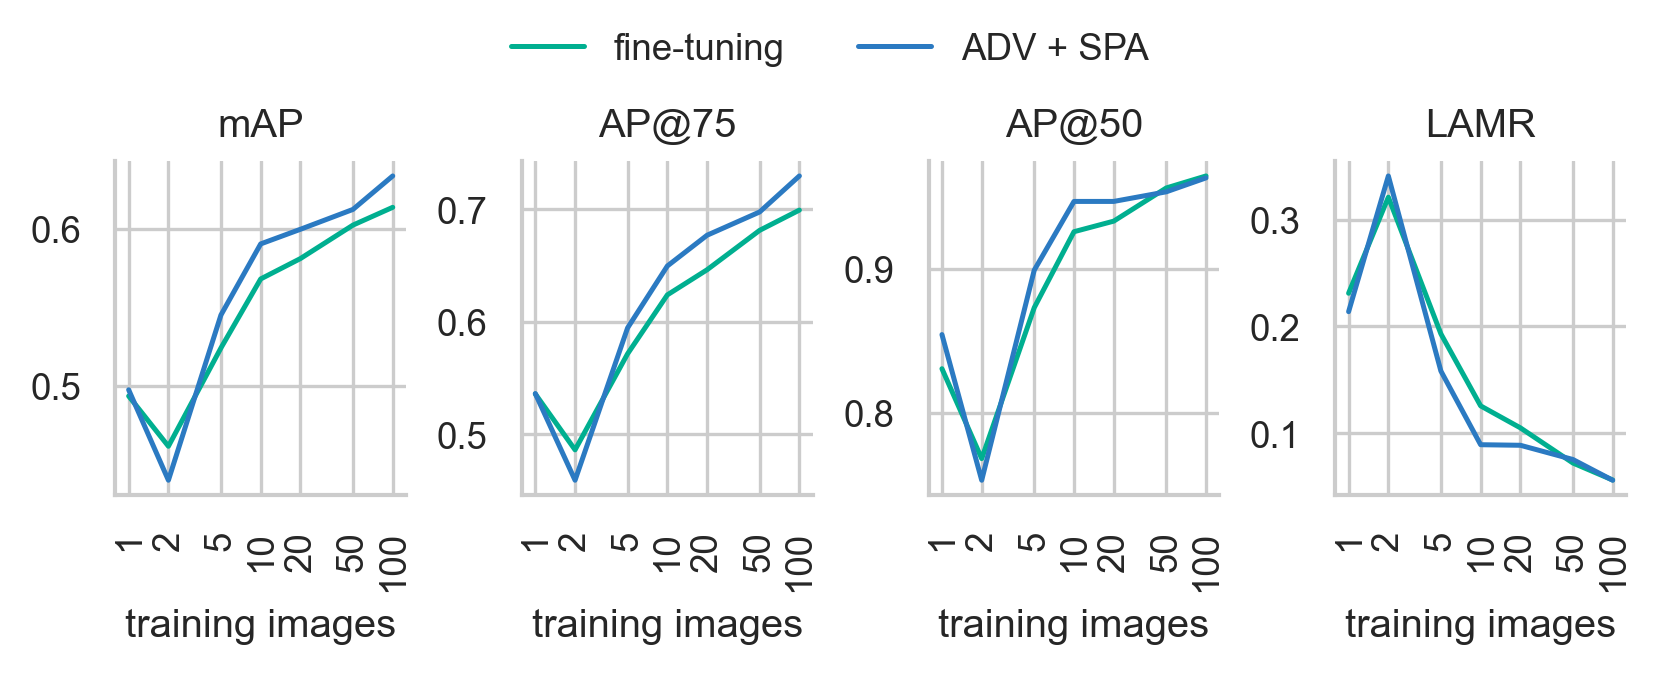

In [129]:
import matplotlib as mpl

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(cyan())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
g = sb.relplot(data=df_mw[(df_mw['setting'].isin(['fine-tuning', 'ADV + SPA']))
                       & (df_mw['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=2,
               aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(5.5, 2)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=None, bottom=None, top=.75, wspace=.4)
# legend
axes = g.axes.flatten()
axes[0].legend([], [], frameon=False)  # remove old legend
h, l = axes[0].get_legend_handles_labels()  # extract handles to manually add one for reference line
g.fig.legend(handles=axes[0].lines, labels=l, loc=9, ncol=4, frameon=False)
# labels
g.set_xlabels('training images')
g.set_ylabels('')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)

# Performance Across Datasets

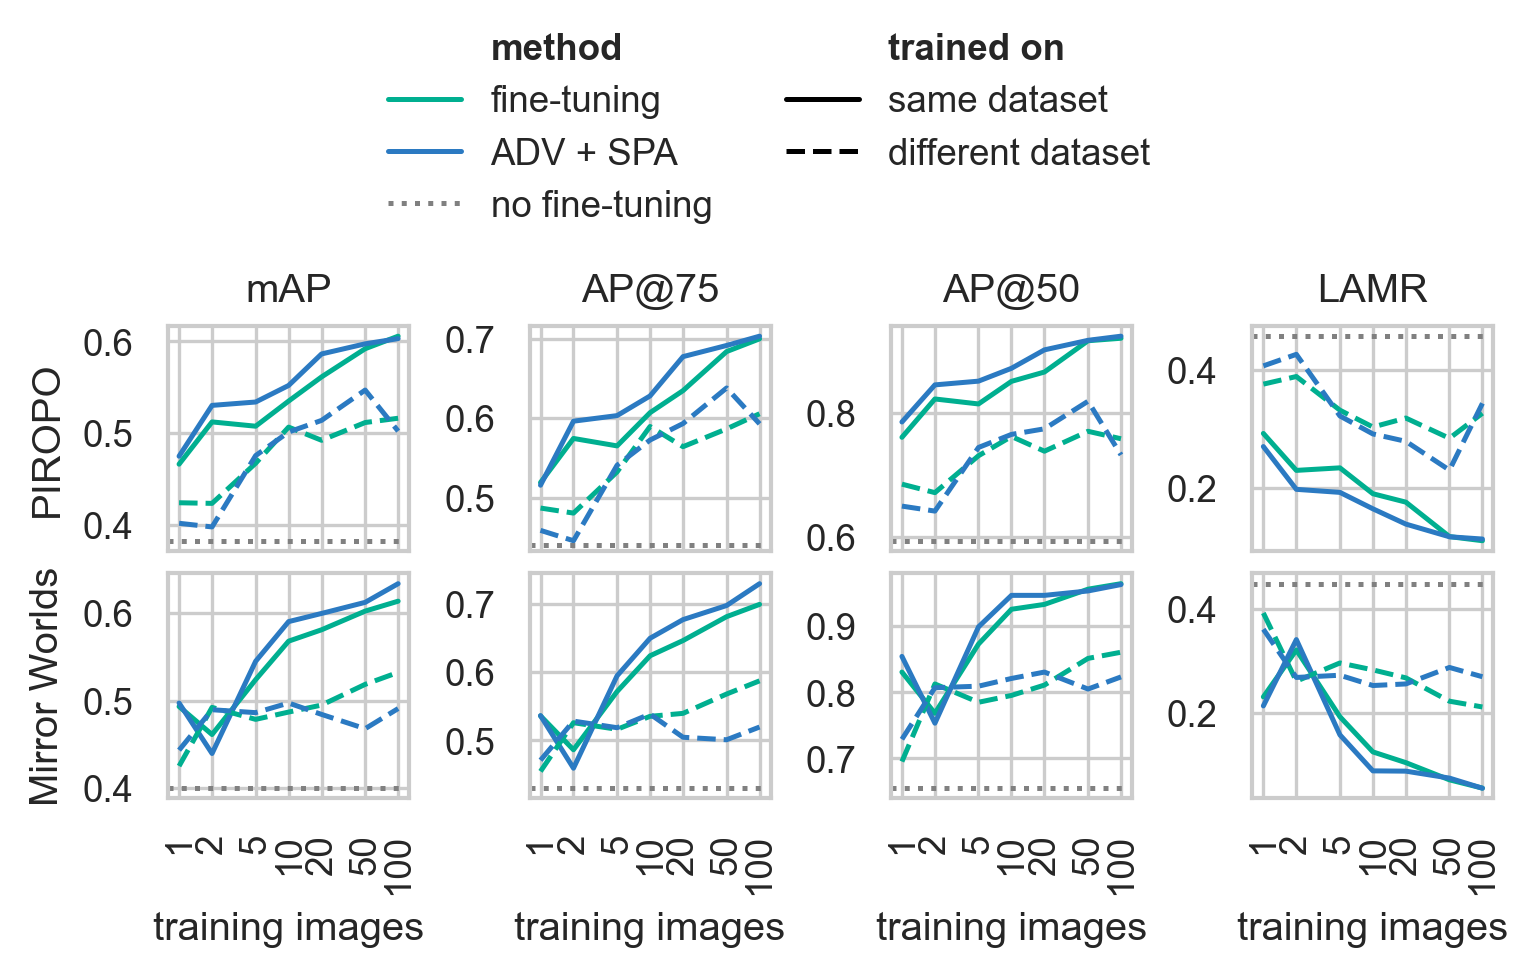

In [12]:
import matplotlib as mpl
from matplotlib import rc

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(cyan())
mpl.rcParams['font.family'] = 'Arial'

# set up figure
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True)
fig.set_size_inches(5.7, 3)
fig.set_dpi(300)
fig.subplots_adjust(left=None, right=None, bottom=None, top=.65, wspace=.5, hspace=.1)
# activate latex text rendering
rc('text', usetex=False)

# draw line plots individually
metrics = ['mAP', 'AP@75', 'AP@50', 'LAMR']
for i, metric in enumerate(metrics):
    sb.lineplot(data=df[(df['setting'].isin(['fine-tuning', 'ADV + SPA', 'fine-tuning MW', 'ADV + SPA MW']))
                          & (df['size'] <= 100) & (df['metric'] == metric)], ax=axes[0, i], x='size', y='value', hue='setting', err_style=None)
    sb.lineplot(data=df_mw[(df_mw['setting'].isin(['fine-tuning', 'ADV + SPA', 'fine-tuning PIROPO', 'ADV + SPA PIROPO']))
                          & (df_mw['size'] <= 100) & (df_mw['metric'] == metric)], ax=axes[1, i], x='size', y='value', hue='setting', err_style=None)
    axes[0, i].set_title(metric)
    axes[1, i].set_xlabel('training images')

# baseline reference line
for i in range(4):
    axes[0, i].axhline(list(baseline.values())[i], ls=':', c='.5')
    axes[1, i].axhline(list(baseline_mw.values())[i], ls=':', c='.5')
# axes[1].set_ylim(ymin=.43)  # adjust scaling to properly show reference line

# legends
for r in range(2):
    for c in range(4):
        axes[r, c].set_ylabel('') # remove y label
        axes[r, c].legend([], [], frameon=False)  # remove old legend
        # recolor and restyle lines
        axes[r, c].lines[1].set_c('#2B7AC2')
        axes[r, c].lines[2].set_c('#00AF90')
        axes[r, c].lines[2].set_linestyle('--')
        axes[r, c].lines[3].set_c('#2B7AC2')
        axes[r, c].lines[3].set_linestyle('--')
# empty handles and category handles for legend
ph = [plt.plot([],marker='', ls='')[0]]*2
h_noft = [plt.plot([], marker='', ls=':', color='.5')[0]]
h1 = [plt.plot([], marker='', ls='solid', color='k')[0]]
h2 = [plt.plot([],marker='', ls='--', color='k')[0]]
handles = axes[0, 0].lines
handles = ph[:1] + handles[:2] + h_noft + ph[1:] + h1 + h2
labels = ['method', 'fine-tuning', 'ADV + SPA', 'no fine-tuning', 'trained on', 'same dataset', 'different dataset']
leg = fig.legend(handles=handles, labels=labels, loc=9, ncol=2, frameon=False)
# set legend columnd headers bold
for vpack in leg._legend_handle_box.get_children():
    for hpack in vpack.get_children()[:1]:
        # hpack.get_children()[0].set_width(0) # modify spacing before text
        hpack.get_children()[1].get_children()[0].set_fontweight('bold')

# labels
axes[0,0].set_ylabel('PIROPO')
axes[1,0].set_ylabel('Mirror Worlds')
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
plt.xticks(ticks=sizes)
for i in range(4):
    axes[1, i].set_xticklabels(labels=sizes, rotation=90)

# adaptation is worth x images

In [8]:
def get_xy_from_df(setting, metric, size=3000):
    # get all entries belonging to setting and metric
    ft = df[(df['setting'] == setting) & (df['metric'] == metric) & (df['size'] <= size)]
    # only extract size and value columns
    ft = ft[['size', 'value']]
    # average over multiple entries with same size
    ft = ft.groupby(['size']).mean()
    # reset index to make size its own column again
    ft = ft.reset_index()
    # convert to array
    ft = ft.to_numpy()
    # convert to x, y series
    return ft


def get_delta_and_quotient(curve1, curve2):
    deltas = []
    quotients = []
    quotients_log = []
    quotients_min = []
    quotients_max = []

    for x, y in curve2:
        # determine whether point lies above or below curve 1
        idx = np.where(curve1[:, 0] == x)[0][0]
        if y < curve1[idx][1]:
            # find first point on curve 1 that lies below current point, and point just after that
            idx = np.where(curve1[:, 1] < y)[0][-1]
            xl, yl = curve1[idx, :]
            xu, yu = curve1[idx + 1, :]
        else:
            # find first point on curve 1 that lies above current point, and point just before that
            idx = np.where(curve1[:, 1] >= y)[0][0]
            xl, yl = curve1[idx - 1, :]
            xu, yu = curve1[idx, :]

        # interpolate to find x-value on curve 1 that corresponds to y
        f = (y - yl) / (yu - yl)
        _x = xl + (xu - xl) * f
        _x_log = xl * ((xu / xl) ** f)

        # calculate delta x
        deltas.append(_x - x)
        quotients.append(_x / x)
        quotients_log.append(_x_log / x)
        quotients_min.append(xl / x)
        quotients_max.append(xu / x)
        # print('projected x:', _x, 'Δx:', _x - x, 'Qx:', _x / x)

    return ({
        'mean Qx': np.mean(quotients),
        'mean log-Qx': np.mean(quotients_log),
        'min Qx': np.mean(quotients_min),
        'max Qx': np.mean(quotients_max),
        'mean Δx': np.mean(deltas),
        'median Δx': np.median(deltas),
        'median Qx': np.median(quotients),
        'deltas': deltas,
        'quotients': quotients,
        'log-quotients': quotients_log,
        'min quotients': quotients_min,
        'max quotients': quotients_max
    })


def quantify_improvement(setting_from, setting_to, metric, size=3000):
    return get_delta_and_quotient(get_xy_from_df(setting_from, metric), get_xy_from_df(setting_to, metric, size))

# ft = get_xy_from_df('fine-tuning', 'AP@50')
# adv = get_xy_from_df('ADV 0', 'AP@50')

In [61]:
quantify_improvement('fine-tuning', 'ADV neck 0 + GPA-GT bbox+cls', 'AP@50', 100)['mean log-Qx']

2.0488678983638473

In [52]:
quantify_improvement('fine-tuning', 'ADV neck 0', 'AP@50', 100)['mean log-Qx']

1.7001432011062292

In [49]:
quantify_improvement('fine-tuning', 'GPA-GT bbox+cls', 'AP@50', 100)

{'mean Qx': 2.18661454020832,
 'mean log-Qx': 2.0888163476911963,
 'min Qx': 1.3571428571428572,
 'max Qx': 2.7857142857142856,
 'mean Δx': 23.176404241165137,
 'median Δx': 7.357798165137609,
 'median Qx': 1.7111111111111135,
 'deltas': [0.4594594594594623,
  7.357798165137609,
  3.807339449541278,
  7.111111111111136,
  13.907284768211873,
  70.40816326530609,
  59.18367346938851],
 'quotients': [1.4594594594594623,
  4.678899082568805,
  1.7614678899082556,
  1.7111111111111135,
  1.6953642384105936,
  2.4081632653061216,
  1.591836734693885],
 'log-quotients': [1.3750265347136885,
  4.574099433420943,
  1.6952145669244694,
  1.6370644390599662,
  1.5292394769830773,
  2.30390564392499,
  1.5071643388112397],
 'min quotients': [1.0, 2.5, 1.0, 1.0, 1.0, 2.0, 1.0],
 'max quotients': [2.0, 5.0, 2.0, 2.0, 2.5, 4.0, 2.0]}

<AxesSubplot:>

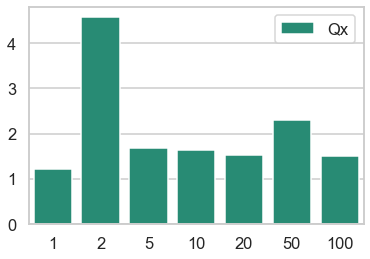

In [6]:
data = {
    'x': [1, 2, 5, 10, 20, 50, 100],
    'y': [
        1.2265402641232137, 4.574099433420943, 1.6952145669244694, 1.6370644390599662, 1.5292394769830773,
        2.30390564392499, 1.5071643388112397
    ],
    'category': ['Qx', 'Qx', 'Qx', 'Qx', 'Qx', 'Qx', 'Qx']
}

sb.barplot(x='x', y='y', hue='category', data=data)

# significance test
## paired Student's t-test
Consider each split its own category, e.g. `1a`, `1b`, ... and test for whole range 1 - 100.

OR

Test each size individually and consider each split `a`, `b`, `c` its own category.

In [11]:
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'


def get_res_per_cat(setting, metric, size, name):
    data = df[(df['setting'] == setting) & (df['metric'] == metric) & (df['size'] <= size)]
    # merge `size` and `split` into category
    data['category'] = data['size'].astype(str) + data['split'].astype(str)
    # reset index
    data = data[['category', 'value']].reset_index(drop=True)
    # rename value column
    data = data.rename(columns={'value': name})
    return data

# combine before/after results in one dataframe
before = get_res_per_cat('fine-tuning', 'AP@50', 100, 'before')
after = get_res_per_cat('ADV + SPA', 'AP@50', 100, 'after')
data = pd.merge(before, after, on='category')

print("Paired Student's t-Test Across Sizes")
data[['before', 'after']].describe()

# results are only valid if p < 0.05 for both
print("  use Shapiro-Wilk test to check whether")
print("  data before/after follows normal distribution:")
print('    before', stats.shapiro(data['before']))
print('    after', stats.shapiro(data['after']))

# actual test
print("  paired t-test:")
print("   ", stats.ttest_rel(data['before'], data['after']))

Paired Student's t-Test Across Sizes
  use Shapiro-Wilk test to check whether
  data before/after follows normal distribution:
    before ShapiroResult(statistic=0.9417226910591125, pvalue=0.25839585065841675)
    after ShapiroResult(statistic=0.8965410590171814, pvalue=0.03553583472967148)
  paired t-test:
    Ttest_relResult(statistic=-4.356111286903181, pvalue=0.00034003222534527883)


In [54]:
from scipy import stats

pd.options.mode.chained_assignment = None  # default='warn'


def get_res_per_cat(setting, metric, size, name):
    data = df[(df['setting'] == setting) & (df['metric'] == metric) & (df['size'] <= size)]
    # reset index
    data = data[['size', 'split', 'value']].reset_index(drop=True)
    # rename value column
    data = data.rename(columns={'value': name})
    return data


# combine before/after results in one dataframe
before = get_res_per_cat('fine-tuning', 'AP@50', 100, 'before')
after = get_res_per_cat('GPA-GT bbox+cls', 'AP@50', 100, 'after')
data = pd.merge(before, after, on=['size', 'split'])

print("Paired Student's t-Test per Size")
# data[['before', 'after']].describe()

for s in data['size'].unique():
    print(f'  N = {s}')
    shap_bef = stats.shapiro(data[data['size'] == s]['before'])[1]
    shap_aft = stats.shapiro(data[data['size'] == s]['after'])[1]
    print(f"    Shapiro-Wilk before: {'yes' if shap_bef > 0.05 else f'no {shap_bef}'}, after: {'yes' if shap_aft > 0.05 else 'no'}")
    print("     ", stats.ttest_rel(data[data['size'] == s]['before'], data[data['size'] == s]['after']))


# # results are only valid if p < 0.05 for both
# print("  use Shapiro-Wilk test to check whether")
# print("  data before/after follows normal distribution:")
# print('    before', stats.shapiro(data['before']))
# print('    after', stats.shapiro(data['after']))

# # actual test
# print("  paired t-test:")
# print("   ", stats.ttest_rel(data['before'], data['after']))

Paired Student's t-Test per Size
  N = 1
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-1.6382546070448618, pvalue=0.24303011271087469)
  N = 2
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-6.375988221950508, pvalue=0.023726355586351822)
  N = 5
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-1.9239992827944201, pvalue=0.19425070330148722)
  N = 10
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-7.341303483857978, pvalue=0.01805374090845507)
  N = 20
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-3.668996928526714, pvalue=0.06691545604422627)
  N = 50
    Shapiro-Wilk before: no -9.106917104872991e-07, after: yes
      Ttest_relResult(statistic=-1.6923076923076923, pvalue=0.23266188294332862)
  N = 100
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-2.514618911619948, pvalue=0.1283860198214821)


# MW-18Mar

In [2]:
from log_analysis import *

baseline_mw = {'mAP': .001, 'AP@75': .0, 'AP@50': .007, 'LAMR': .9914}

sweeps_mw = {}

sizes = [1, 2, 5, 10, 20, 50, 100, 200, 'all']
sweeps_mw['fine-tuning'] = df_from_sweep('sweeps_mw/fine-tune', sizes, all_size=819)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['ADV neck 0 + GPA-GT bbox+cls'] = df_from_sweep('sweeps_mw/adv_0_gpa_-xg', sizes)

sizes = [1,2,5,10,20,50,100]
sweeps_mw['fine-tuning PIROPO'] = df_from_sweep('sweeps_mw/fine-tune_piropo', sizes, alt_pattern=True)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['ADV neck 0 + GPA-GT bbox+cls PIROPO'] = df_from_sweep('sweeps_mw/adv_0_gpa_-xg_piropo', sizes, alt_pattern=True)

df_mw = pd.concat(sweeps_mw.values(), keys=sweeps_mw.keys()).rename_axis(['setting', None]).reset_index(level=0)
df_mw.replace(['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50'], ['mAP', 'AP@75', 'AP@50'], inplace=True)
df_mw.head()


no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log


,setting,size,split,metric,value
0,fine-tuning,1,a,mAP,0.522
1,fine-tuning,1,b,mAP,0.479
2,fine-tuning,1,c,mAP,0.479
3,fine-tuning,2,a,mAP,0.406
4,fine-tuning,2,b,mAP,0.501


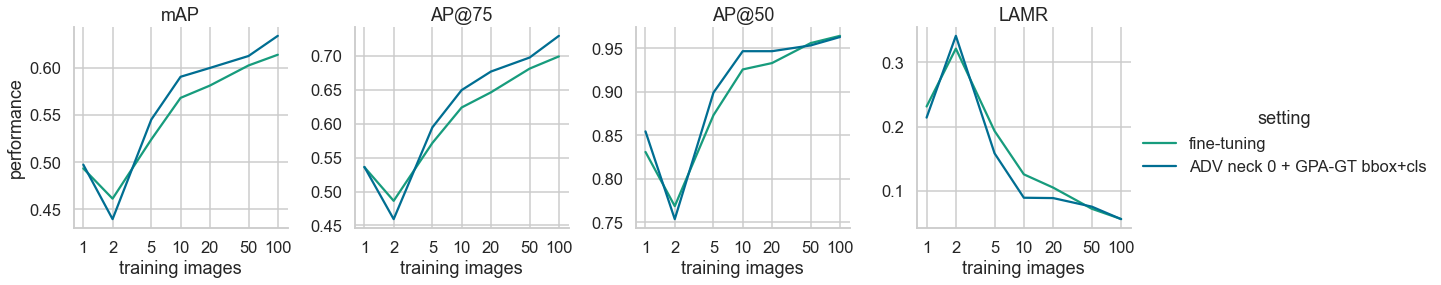

In [5]:
import matplotlib as mpl

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
# hue_order = ['fine-tuning', 'GPA-GT bbox+cls', 'ADV neck 0', 'ADV neck 0 + GPA-GT bbox+cls']
g = sb.relplot(
    data=df_mw[(df_mw['setting'].isin(['fine-tuning', 'ADV neck 0 + GPA-GT bbox+cls']))
            & (df_mw['size'] <= 100)],
    x='size',
    y='value',
    col='metric',
    hue='setting',
    # hue_order=hue_order,
    kind='line',
    err_style=None,
    facet_kws={
        'sharey': False,
        'sharex': True
    },
    height=4,
    aspect=1)
# baseline reference line
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axhline(list(baseline.values())[i], ls='--', c='.5')  #, dashes=(2,1), zorder=0)
#     ax.text(4, list(baseline.values())[i] + (-0.04 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
# g.set_xticklabels(rotation=90)
g.savefig(f'images/sweep_gpa_adv_mw18mar.svg')

In [6]:
ft = df_mw[(df_mw['setting'] == 'fine-tuning') & (df_mw['size'] <= 100) & (df_mw['metric'] == 'AP@50')].groupby('size').mean()
gpa = df_mw[(df_mw['setting'] == 'ADV neck 0 + GPA-GT bbox+cls') & (df_mw['size'] <= 100) &
            (df_mw['metric'] == 'AP@50')].groupby('size').mean()
(gpa - ft).mean()

value    0.009333
dtype: float64

In [9]:
def get_xy_from_df(setting, metric, size=3000):
    # get all entries belonging to setting and metric
    ft = df_mw[(df_mw['setting'] == setting) & (df_mw['metric'] == metric) & (df_mw['size'] <= size)]
    # only extract size and value columns
    ft = ft[['size', 'value']]
    # average over multiple entries with same size
    ft = ft.groupby(['size']).mean()
    # reset index to make size its own column again
    ft = ft.reset_index()
    # convert to array
    ft = ft.to_numpy()
    # convert to x, y series
    return ft


def get_delta_and_quotient(curve1, curve2):
    deltas = []
    quotients = []
    quotients_log = []
    quotients_min = []
    quotients_max = []

    for x, y in curve2:
        # determine whether point lies above or below curve 1
        idx = np.where(curve1[:, 0] == x)[0][0]
        if y < curve1[idx][1]:
            # find first point on curve 1 that lies below current point, and point just after that
            idx = np.where(curve1[:, 1] < y)[0][-1]
            xl, yl = curve1[idx, :]
            xu, yu = curve1[idx + 1, :]
        else:
            # find first point on curve 1 that lies above current point, and point just before that
            idx = np.where(curve1[:, 1] >= y)[0][0]
            xl, yl = curve1[idx - 1, :]
            xu, yu = curve1[idx, :]

        # interpolate to find x-value on curve 1 that corresponds to y
        f = (y - yl) / (yu - yl)
        _x = xl + (xu - xl) * f
        _x_log = xl * ((xu / xl) ** f)

        # calculate delta x
        deltas.append(_x - x)
        quotients.append(_x / x)
        quotients_log.append(_x_log / x)
        quotients_min.append(xl / x)
        quotients_max.append(xu / x)
        # print('projected x:', _x, 'Δx:', _x - x, 'Qx:', _x / x)

    return ({
        'mean Qx': np.mean(quotients),
        'mean log-Qx': np.mean(quotients_log),
        'min Qx': np.mean(quotients_min),
        'max Qx': np.mean(quotients_max),
        'mean Δx': np.mean(deltas),
        'median Δx': np.median(deltas),
        'median Qx': np.median(quotients),
        'deltas': deltas,
        'quotients': quotients,
        'log-quotients': quotients_log,
        'min quotients': quotients_min,
        'max quotients': quotients_max
    })


def quantify_improvement(setting_from, setting_to, metric, size=3000):
    return get_delta_and_quotient(get_xy_from_df(setting_from, metric), get_xy_from_df(setting_to, metric, size))

# ft = get_xy_from_df('fine-tuning', 'AP@50')
# adv = get_xy_from_df('ADV 0', 'AP@50')

In [10]:
quantify_improvement('fine-tuning', 'ADV neck 0 + GPA-GT bbox+cls', 'AP@50', 100)['mean log-Qx']

IndexError: index -1 is out of bounds for axis 0 with size 0

## cross-dataset performance

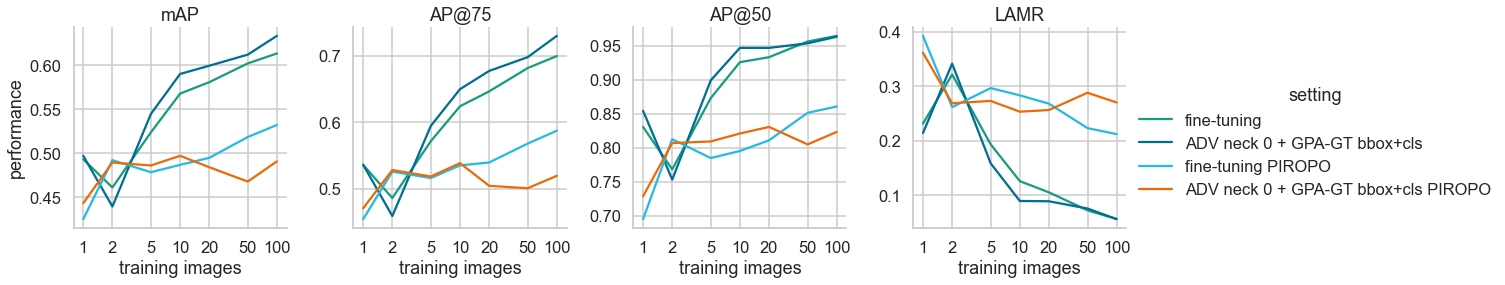

In [11]:
import matplotlib as mpl

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
# hue_order = ['fine-tuning', 'GPA-GT bbox+cls', 'ADV neck 0', 'ADV neck 0 + GPA-GT bbox+cls']
g = sb.relplot(
    data=df_mw[(df_mw['setting'].isin(['fine-tuning', 'fine-tuning PIROPO', 'ADV neck 0 + GPA-GT bbox+cls', 'ADV neck 0 + GPA-GT bbox+cls PIROPO']))
               & (df_mw['size'] <= 100)],
    x='size',
    y='value',
    col='metric',
    hue='setting',
    # hue_order=hue_order,
    kind='line',
    err_style=None,
    facet_kws={
        'sharey': False,
        'sharex': True
    },
    height=4,
    aspect=1)
# baseline reference line
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axhline(list(baseline.values())[i], ls='--', c='.5')  #, dashes=(2,1), zorder=0)
#     ax.text(4, list(baseline.values())[i] + (-0.04 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
# g.set_xticklabels(rotation=90)
g.savefig(f'images/sweep_gpa_adv_mw18mar_vs_piropo.svg')